In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime

In [15]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2021, 11, 13), end=datetime(2023, 6, 13)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["GME","AMC", "BBBY"] 
data = get_historical_Data(ticks)
print(data.shape)
# Most Recent Data
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(395, 3)


,GME,AMC,BBBY
Date,,,
2023-06-06,24.690001,4.64,0.2460
2023-06-07,26.110001,4.73,0.2341
2023-06-08,21.440001,4.68,0.2099
2023-06-09,22.680000,4.77,0.2158
2023-06-12,24.299999,4.79,0.2199


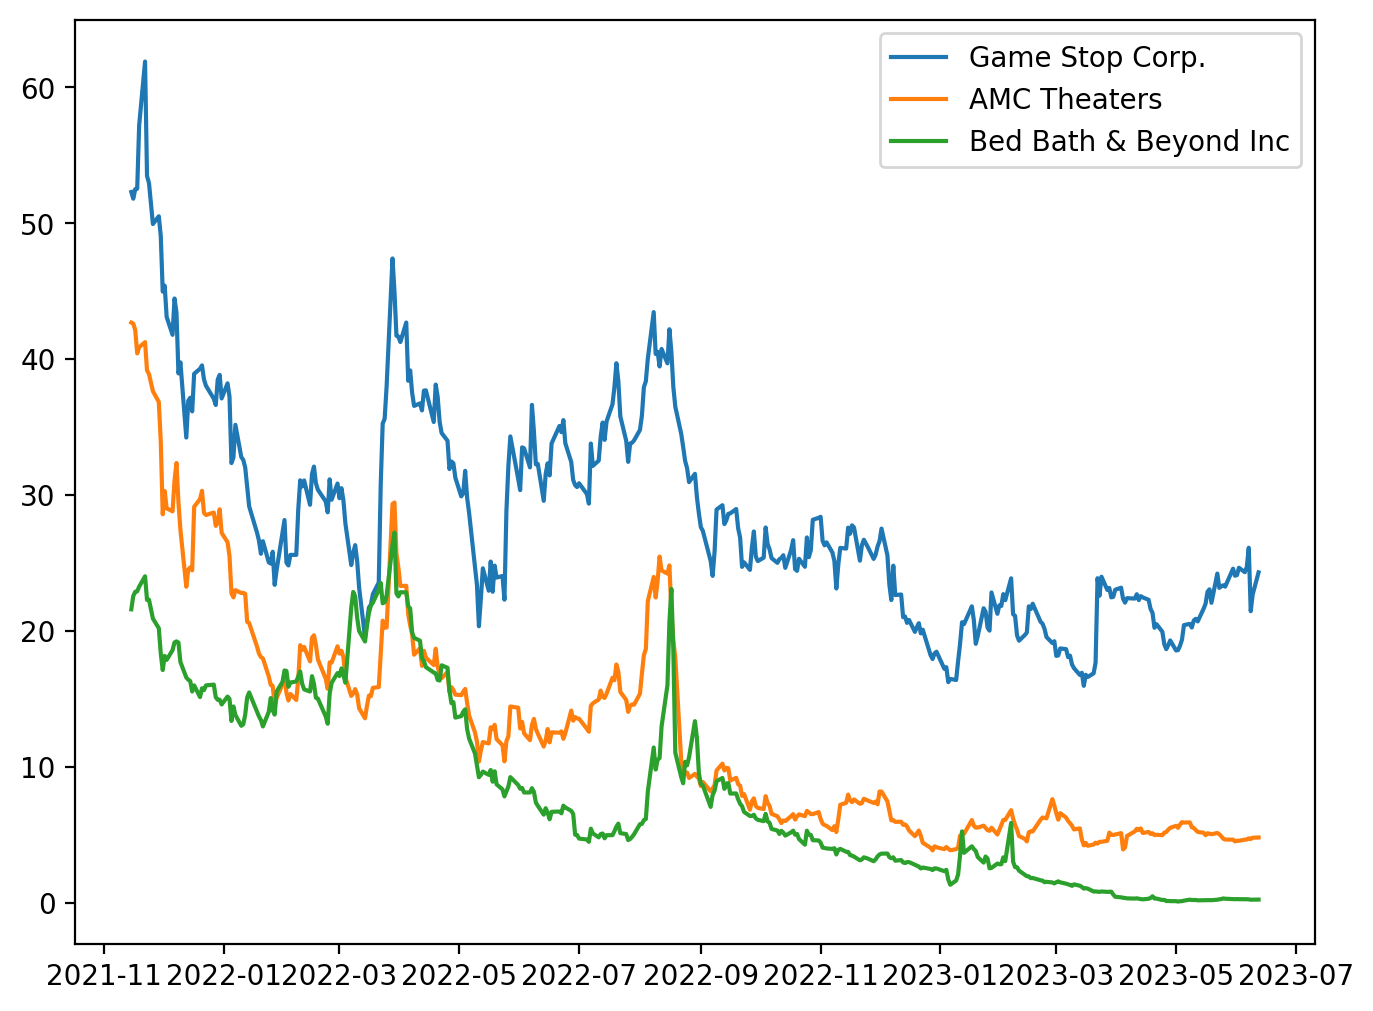

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
GME = data['GME']
AMC = data['AMC']
BBBY = data['BBBY']


plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend()

In [17]:
d = data.pct_change()[1:] # Converting to get percentage changes, 1: removes the first NaN element.
AMC = d['AMC']
AMC.values, AMC.mean()

(array([-1.87445713e-03, -1.10328034e-02, -4.08260427e-02,  1.13832983e-02,
         9.05316262e-03, -5.04365118e-02, -6.89480232e-03, -3.23990317e-02,
        -2.09939116e-02, -7.87188250e-02, -1.58220364e-01,  5.98530280e-02,
        -4.19418900e-02, -7.58356814e-03,  7.81521337e-02,  4.22035283e-02,
        -8.93353795e-02, -6.85675021e-02, -1.53061249e-01,  5.42168779e-02,
         6.53060602e-03, -8.51577801e-03,  1.91002042e-01,  1.99175792e-02,
         2.02019683e-02, -5.34653126e-02, -5.57879518e-03,  6.31137105e-03,
        -3.41463911e-02,  8.29731080e-03,  3.54203844e-02, -6.01243863e-02,
        -2.50000105e-02, -3.88386376e-02, -1.07493127e-01, -1.27472930e-02,
         2.35975382e-02, -9.13436653e-03,  4.38991597e-04, -3.07159278e-03,
        -9.06689933e-02, -4.35625137e-03, -8.41030417e-02, -2.76008733e-02,
        -1.36462884e-02, -5.53405552e-03, -7.40122412e-02, -3.72595526e-02,
        -4.99381243e-03, -8.90840125e-02,  3.71900788e-02,  6.64009972e-02,
         4.9

<h1>Rate of change</h1>

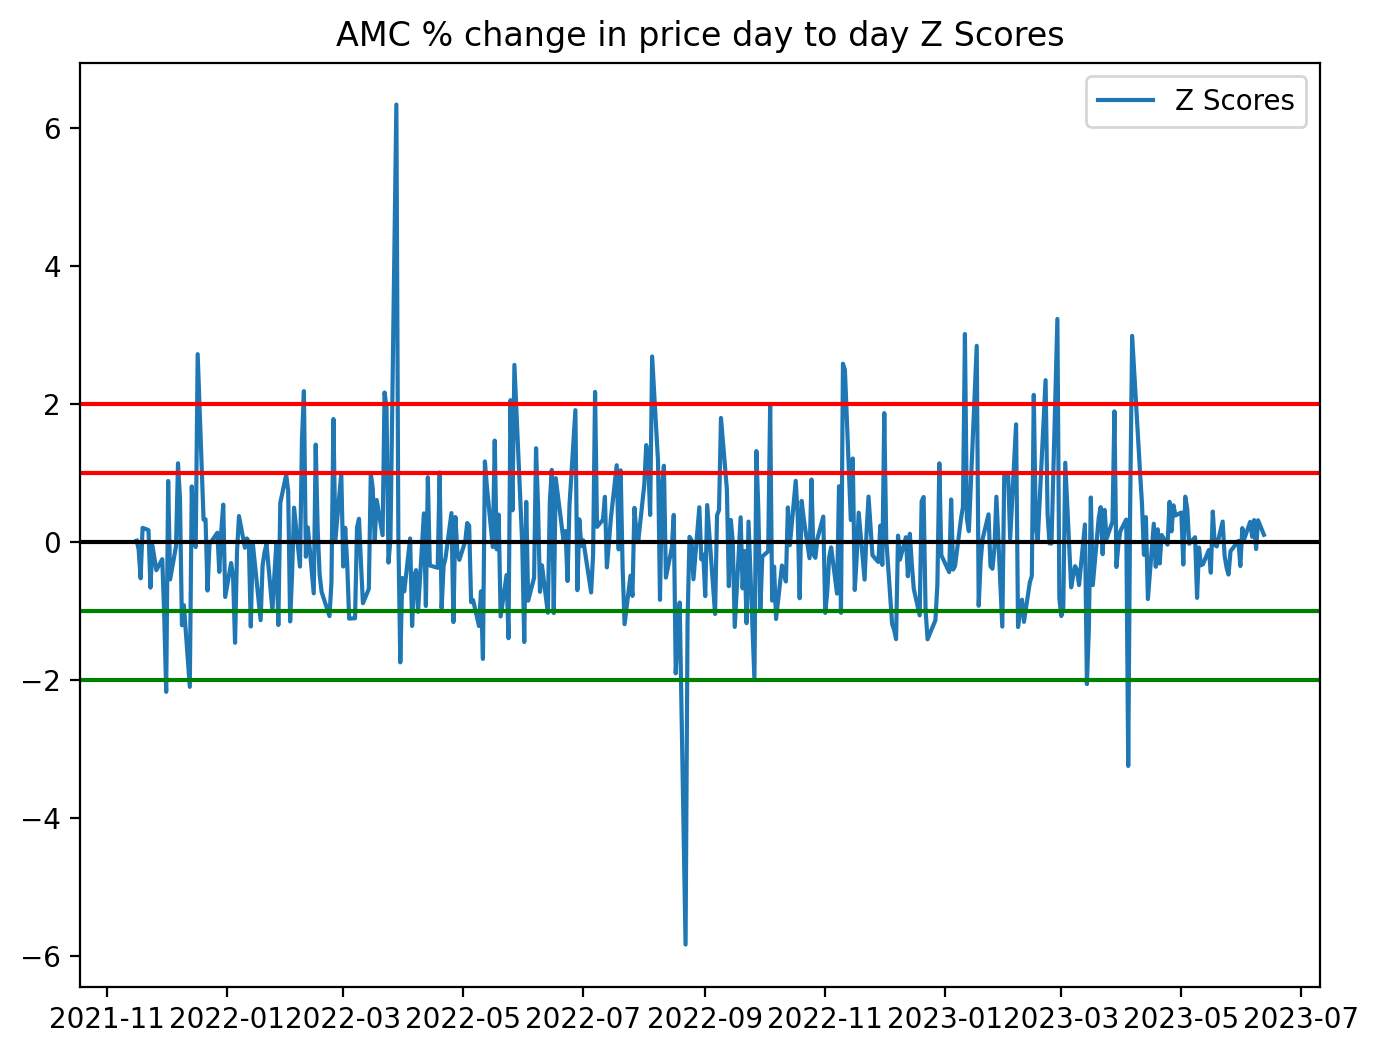

In [18]:
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (AMC - AMC.mean())/AMC.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(2.0, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-2.0, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('AMC % change in price day to day Z Scores')
plt.show()

In [31]:
data_mi = data.diff(10)
data_mi

,GME,AMC,BBBY
Date,,,
2021-11-15,NaN,NaN,NaN
2021-11-16,NaN,NaN,NaN
2021-11-17,NaN,NaN,NaN
2021-11-18,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN
...,...,...,...
2023-06-06,0.480001,-0.48,0.0370
2023-06-07,2.950001,-0.30,-0.0070
2023-06-08,-1.830000,-0.20,-0.0490


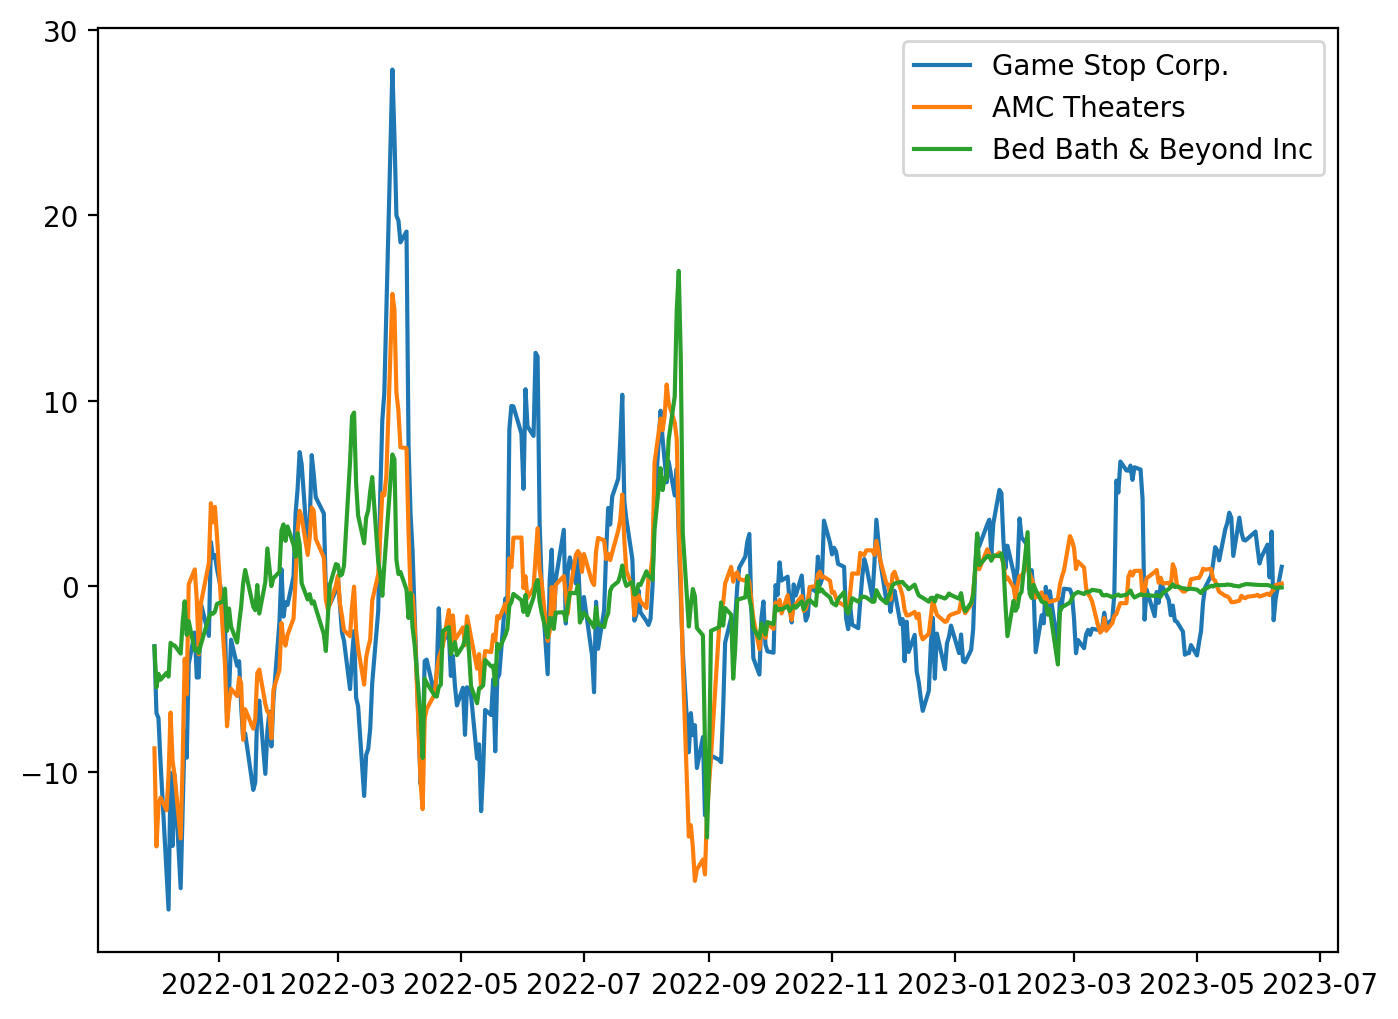

In [32]:
figure(figsize=(8, 6), dpi=200)
GME = data_mi['GME']
AMC = data_mi['AMC']
BBBY = data_mi['BBBY']

plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

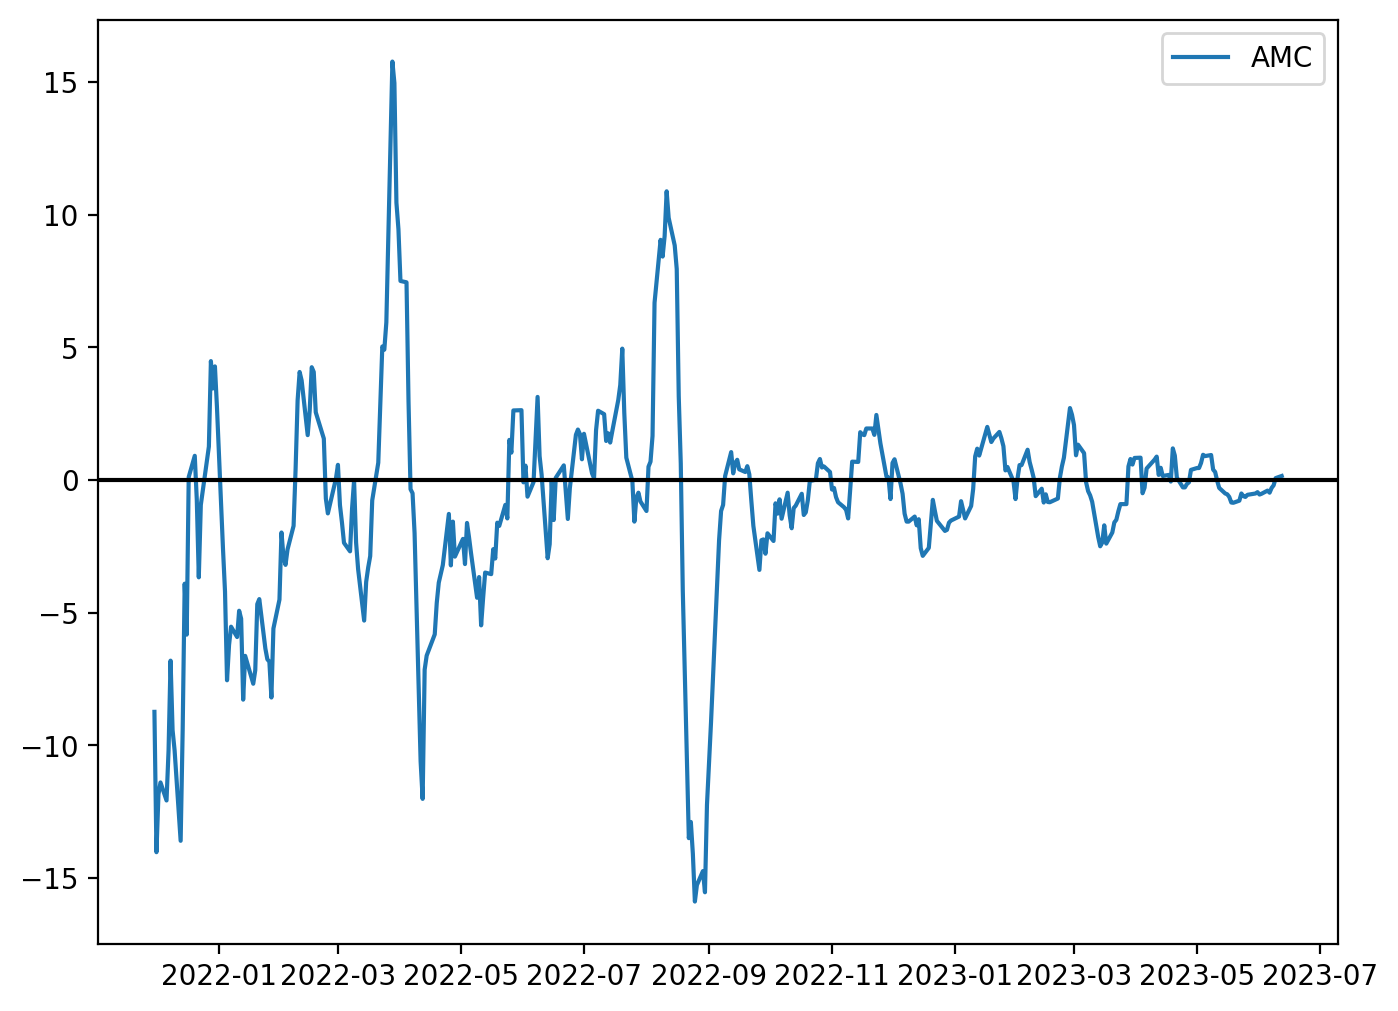

In [37]:
figure(figsize=(8, 6), dpi=200)
AMC = data_mi['AMC']
# AMC = data_mi['AMC']
# BBBY = data_mi['BBBY']

plt.plot(AMC, label = "AMC")
plt.axhline(0, color="black")
# plt.plot(AMC, label = "AMC Theaters")
# plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

# Gist is that anything above the '0' line is considered bullish momentum and anything below the '0' line is bearish momentum



In [ ]:
a